- **NAMA** : Muhammad Akhyat Tariq R
- **NIM** : 2309106119

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning
ini untuk memastikan data yang digunakan benar-benar **bersih, valid, dan representatif**.  
Data yang kotor atau duplikat dapat membuat model belajar dengan cara yang salah atau menghasilkan prediksi yang tidak akurat.

In [5]:
df=pd.read_csv('online_gaming_behavior_dataset.csv')

# Handling Missing Value
df.isnull().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


In [6]:
# Handling Duplicate Value
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


<Axes: ylabel='Age'>

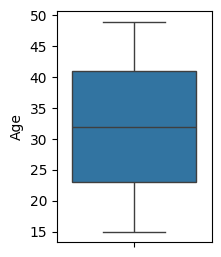

In [7]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df['Age']) #buat boxplot

## Normalisasi/standarisasi kolom numerik
Kolom numerik seperti `Age`, `PlayTimeHours`, dan `SessionsPerWeek` dinormalisasi menggunakan **StandardScaler**  
agar semua fitur berada dalam skala yang sama (mean = 0, standar deviasi = 1).

Normalisasi dilakukan agar tidak ada fitur dengan nilai besar yang **mendominasi perhitungan model**.


In [10]:
from sklearn.preprocessing import StandardScaler

# Kolom numerik yang akan dinormalisasi
numeric_cols = ['Age', 'PlayTimeHours', 'InGamePurchases',
                'SessionsPerWeek', 'AvgSessionDurationMinutes',
                'PlayerLevel', 'AchievementsUnlocked']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].head()


,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,1.096023,0.614176,-0.501334,-0.602363,0.269487,1.026459,0.032814
1,-0.297969,-0.939816,-0.501334,-0.775865,1.004019,-1.352160,-1.006648
2,-0.994965,-0.549654,-0.501334,1.132666,0.963212,-0.512647,1.141573
3,0.299456,-0.977506,1.994676,-0.081854,-0.199798,0.256906,1.557358
4,0.100314,0.507275,-0.501334,-1.296374,0.738771,1.586134,0.864383


## Encoding kolom kategorikal
Kolom kategorikal seperti `Gender`, `Location`, `GameGenre`, `GameDifficulty`, dan `EngagementLevel` diubah menjadi bentuk numerik menggunakan **One-Hot Encoding**.  
Kolom `Gender_Male` juga diganti namanya menjadi `Gender` agar lebih mudah dibaca (1 = Male, 0 = Female).

Dengan encoding, kategori seperti “Male” atau “Female” dapat direpresentasikan dalam bentuk angka **tanpa kehilangan makna aslinya**.  
Parameter `drop='first'` digunakan untuk mencegah ketergantungan antar kolom.


In [24]:
from sklearn.preprocessing import OneHotEncoder

# Kolom kategorikal
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

if 'Female' in df.columns:
    df = df.drop(columns=['Female'])

# Gunakan encoder dan ubah hasil ke array padat
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Jalankan encoding dan ubah hasil ke DataFrame
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Gabungkan hasil encoding dengan data numerik
df_encoded = pd.concat(
    [df.reset_index(drop=True).drop(columns=categorical_cols),
     encoded_df.reset_index(drop=True)],
    axis=1
)

if 'Gender_Male' in df_encoded.columns:
    df_encoded = df_encoded.rename(columns={'Gender_Male': 'Gender'})

# Tampilkan hasil akhir
df_encoded.head()


,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_Low,EngagementLevel_Medium
0,9000,1.096023,0.614176,-0.501334,-0.602363,0.269487,1.026459,0.032814,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,9001,-0.297969,-0.939816,-0.501334,-0.775865,1.004019,-1.352160,-1.006648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,9002,-0.994965,-0.549654,-0.501334,1.132666,0.963212,-0.512647,1.141573,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,9003,0.299456,-0.977506,1.994676,-0.081854,-0.199798,0.256906,1.557358,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9004,0.100314,0.507275,-0.501334,-1.296374,0.738771,1.586134,0.864383,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Feature engineering (minimal 1 feature baru)
Dibuat fitur baru bernama **`AvgMinutesPerSession`**,  
yang dihitung dari `(PlayTimeHours * 60) / SessionsPerWeek`.  
Fitur ini menggambarkan rata-rata menit bermain per sesi untuk tiap pemain.

Menambah fitur baru membantu model memahami **pola perilaku pemain dengan lebih baik**.  
Fitur `AvgMinutesPerSession` berguna untuk melihat tingkat intensitas bermain,  
yang bisa berhubungan langsung dengan tingkat keterlibatan (*engagement level*) pemain.


In [26]:
# Buat fitur baru: rata-rata menit bermain per sesi
df_encoded['AvgMinutesPerSession'] = (df['PlayTimeHours'] * 60) / df['SessionsPerWeek']

# Lihat hasil fitur baru
print(" Fitur baru 'AvgMinutesPerSession' berhasil ditambahkan!")
df_encoded[['PlayTimeHours', 'SessionsPerWeek', 'AvgMinutesPerSession']].head()


✅ Fitur baru 'AvgMinutesPerSession' berhasil ditambahkan!


,PlayTimeHours,SessionsPerWeek,AvgMinutesPerSession
0,0.614176,-0.602363,-61.176735
1,-0.939816,-0.775865,72.678768
2,-0.549654,1.132666,-29.116478
3,-0.977506,-0.081854,716.522867
4,0.507275,-1.296374,-23.478181


## Splitting data ke dalam data training & data testing
Dataset dibagi menjadi dua bagian:
- **Training set (80%)** → digunakan untuk melatih model.
- **Testing set (20%)** → digunakan untuk menguji performa model.

Pembagian dilakukan dengan fungsi `train_test_split()` dari Scikit-learn dengan `random_state=42` agar hasil tetap konsisten setiap kali dijalankan.

Pemecahan data ini mencegah **overfitting** dan memastikan model dapat **menggeneralisasi** dengan baik pada data baru.  
Dengan data uji yang terpisah, kita dapat mengevaluasi seberapa akurat model dalam memprediksi data yang belum pernah dilihat sebelumnya.


In [28]:
from sklearn.model_selection import train_test_split

# Target (y): EngagementLevel
# Fitur (X): semua kolom kecuali PlayerID
y = df['EngagementLevel']
X = df_encoded.drop(columns=['PlayerID'])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Data berhasil dibagi!")
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)


 Data berhasil dibagi!
Ukuran X_train: (32027, 20)
Ukuran X_test : (8007, 20)
Ukuran y_train: (32027,)
Ukuran y_test : (8007,)
